In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/Princia/Downloads/Housing dataset.csv")

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,yes,no,no,no,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes
2,12250000,9960,3,2,2,yes,no,yes,no,no
3,12215000,7500,4,2,2,yes,no,yes,no,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no
541,1767150,2400,3,1,1,no,no,no,no,no
542,1750000,3620,2,1,1,yes,no,no,no,no
543,1750000,2910,3,1,1,no,no,no,no,no


In [4]:
data.shape

(545, 10)

In [6]:
df=data[['price','area','bedrooms','bathrooms']]
df.shape

(545, 4)

In [8]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import statsmodels.api as sm
cols=['area','bedrooms','bathrooms']
df[cols]=df[cols].apply(pd.to_numeric,errors='coerce')
df['price']=pd.to_numeric(df['price'],errors='coerce')


In [14]:
X=sm.add_constant(df.drop('price',axis=1))
y=df['price']

In [15]:
 model=sm.OLS(y,X).fit()

In [17]:
print("The impact of area,number of bedrooms and bathrooms on the house price is:")
model.params

The impact of area,number of bedrooms and bathrooms on the house price is:


const       -1.731716e+05
area         3.787628e+02
bedrooms     4.068200e+05
bathrooms    1.386049e+06
dtype: float64

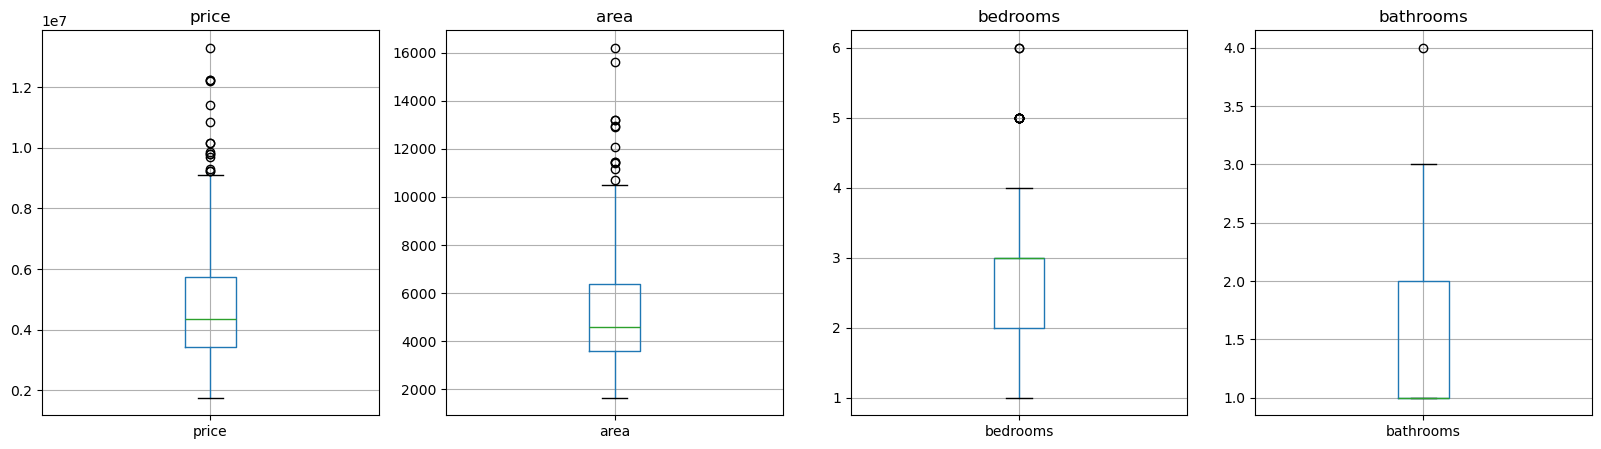

In [19]:
import matplotlib.pyplot as plt
def plot_boxplot(df):
    fig=plt.figure(figsize=(20,5))
    axes=fig.subplots(1,len(df.columns))
    for i,cols in enumerate(df.columns):
        df.boxplot(column=cols,ax=axes[i])
        axes[i].set_title(cols)
    plt.show()

plot_boxplot(df)

In [20]:
def remove_outliers(df):
    df_no_outliers=df.copy()

    for col_name in df.columns:
        Q1=df[col_name].quantile(0.25)
        Q3=df[col_name].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-IQR*1.5
        upper_bound=Q3+IQR*1.5

        df_no_outliers[col_name]=df_no_outliers[col_name].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
    return df_no_outliers

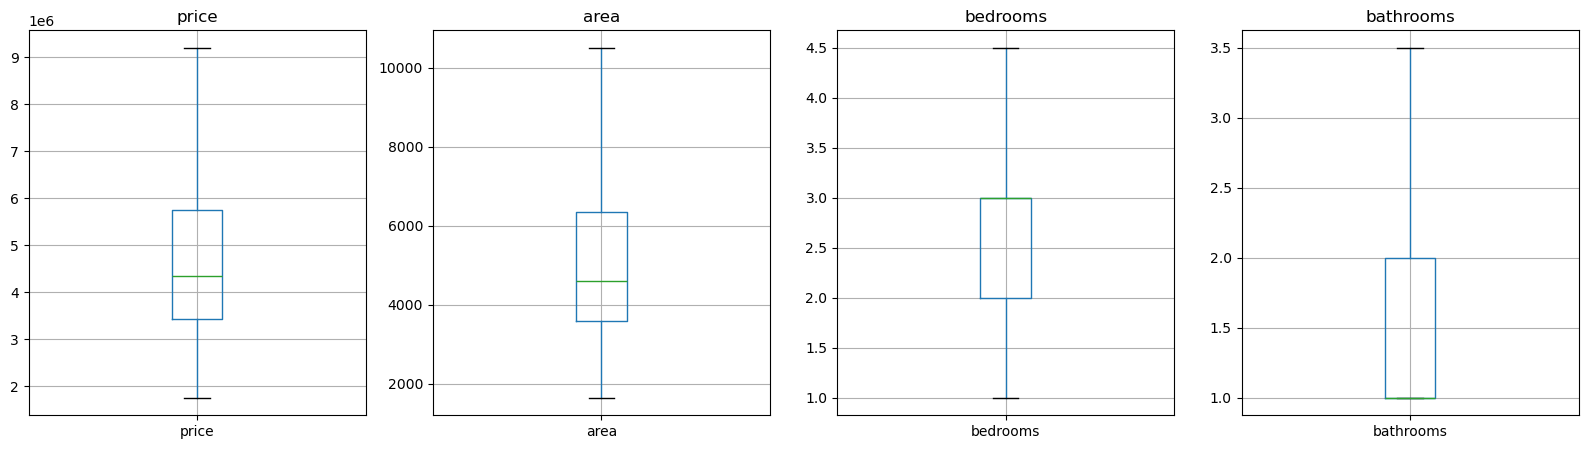

In [22]:
new_df=remove_outliers(df)
plot_boxplot(new_df)

In [23]:
cols=['area','bedrooms','bathrooms']
new_df[cols]=new_df[cols].apply(pd.to_numeric,errors='coerce')
new_df['price']=pd.to_numeric(new_df['price'],errors='coerce')


In [24]:
X=sm.add_constant(new_df.drop('price',axis=1))
y=new_df['price']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model=sm.OLS(y_train,X_train).fit()

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean sqaured error of the model is:",round(mse,3))
print("r square score of the model is:",round(r2,3))

Mean sqaured error of the model is: 2137732036071.039
r square score of the model is: 0.471


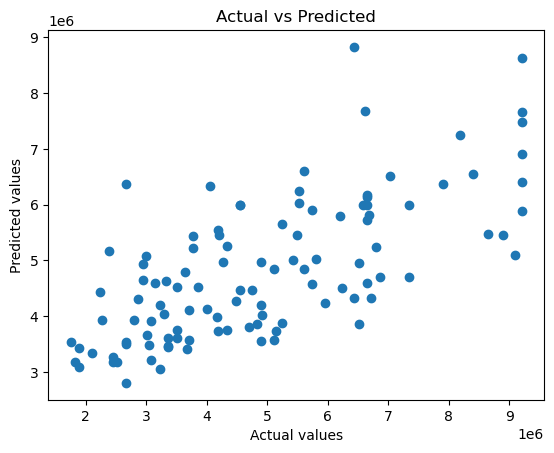

In [41]:
plt.scatter(y_test,y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [43]:
X.sample(5)

,const,area,bedrooms,bathrooms
343,1.0,4080.0,2.0,1.0
354,1.0,8400.0,2.0,1.0
50,1.0,7440.0,3.0,2.0
190,1.0,7600.0,4.0,1.0
194,1.0,8150.0,3.0,2.0


In [45]:
import numpy as np
new_data=np.array([[1.0,6000.0,3.0,1.0]])
model_pred=model.predict(new_data)
print("Predicted House price is",round(model_pred[0],2))

Predicted House price is 4701505.75
